<a href="https://colab.research.google.com/github/AnuragRachoti/ANN-Regression/blob/main/UPDATED_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
tf.__version__

'2.17.1'

In [ ]:
df = pd.read_excel('Folds5x2_pp.xlsx')
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


In [ ]:
#data preprocessing
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [ ]:
##splitting the data into training and test set.

from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=0)



In [ ]:
#Building an ANN.

#creating an object of sequential class of tensorflow...

ann_df = tf.keras.models.Sequential()



In [ ]:
##initializing inputs and adding hidden layers.

#first hidden layer

ann_df.add(tf.keras.layers.Dense(units=6, activation='relu'))

#second hidden layer
ann_df.add(tf.keras.layers.Dense(units=6, activation='relu'))

#output layer
ann_df.add(tf.keras.layers.Dense(units=1))

#summary
ann_df.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## compiling the ann_df

ann_df.compile(optimizer='adam',loss = 'mean_squared_error')




In [ ]:
## training the ann model in the training set.

history = ann_df.fit(X_train,y_train, epochs=150, batch_size = 32, validation_split=0.2)

Epoch 1/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27.9411 - val_loss: 26.1247
Epoch 2/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.4733 - val_loss: 25.9821
Epoch 3/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.8597 - val_loss: 25.1597
Epoch 4/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27.1302 - val_loss: 25.3413
Epoch 5/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25.7462 - val_loss: 26.2953
Epoch 6/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.9132 - val_loss: 25.2917
Epoch 7/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 27.3723 - val_loss: 26.6023
Epoch 8/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.8059 - val_loss: 25.2648
Epoch 9/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 24.7157 - val_loss: 26.9297
Epoch 10/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 28.2069 - val_loss: 28.9829
Epoch 11/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 28.3025 - val_loss: 25.6324
Epoch 12/150
192/19

In [ ]:
#predicting based on test set.

y_pred = ann_df.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred) ,1) , y_test.reshape(len(y_test) ,1)), axis = 1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[430.31 431.23]
 [461.37 460.01]
 [464.86 461.14]
 ...
 [472.15 473.26]
 [438.82 438.  ]
 [458.11 463.28]]


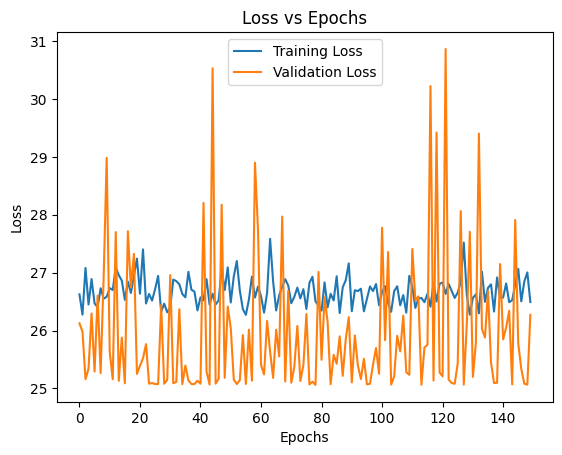

In [ ]:

import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()
# Plot loss vs epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy vs epochs
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')